In [2]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import ast
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

<Axes: ylabel='job_title_short'>

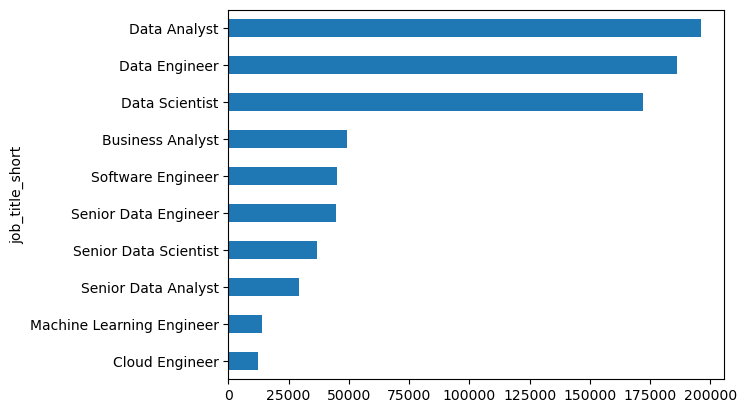

In [12]:
fig, ax = plt.subplots()

df['job_title_short'].value_counts().sort_values().plot(kind='barh', ax = ax)

In [13]:
df['job_schedule_type'].value_counts().head(3)

job_schedule_type
Full-time     701727
Contractor     34793
Internship      8742
Name: count, dtype: int64

<Axes: ylabel='job_schedule_type'>

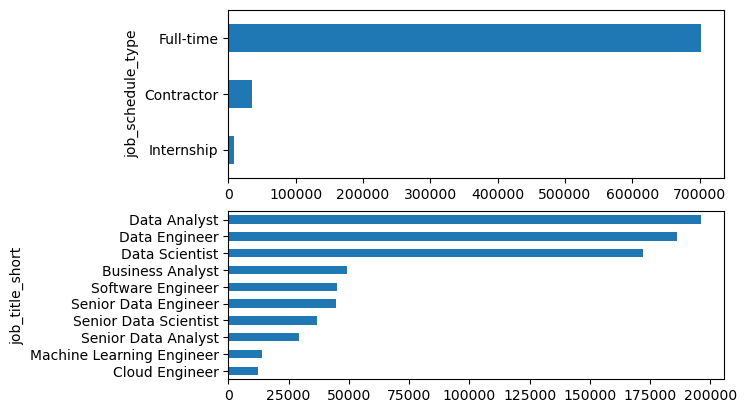

In [19]:
fig, ax = plt.subplots(2,1)

df['job_title_short'].value_counts().sort_values().plot(kind='barh', ax=ax[1])
df['job_schedule_type'].value_counts().head(3).sort_values().plot(kind='barh',ax=ax[0])


In [24]:
# Plotting top skills for data scientist, data engineer anddata analyst.

df_explode = df.explode('job_skills',ignore_index=True).copy()

df_data_scientist = df_explode[df_explode['job_title_short'] == 'Data Scientist']['job_skills'].value_counts().head(5).sort_values()
df_data_engineer = df_explode[df_explode['job_title_short'] == 'Data Engineer']['job_skills'].value_counts().head(5).sort_values()
df_data_analyst = df_explode[df_explode['job_title_short'] == 'Data Analyst']['job_skills'].value_counts().head(5).sort_values()

<Axes: ylabel='job_skills'>

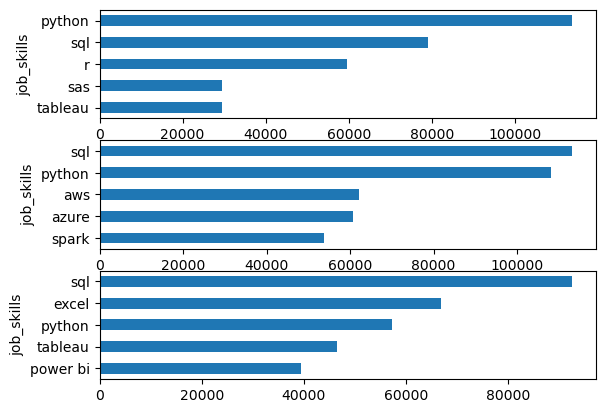

In [25]:
fig, ax = plt.subplots(3,1)

df_data_scientist.plot(kind='barh', ax=ax[0])
df_data_engineer.plot(kind='barh', ax=ax[1])
df_data_analyst.plot(kind='barh', ax=ax[2])

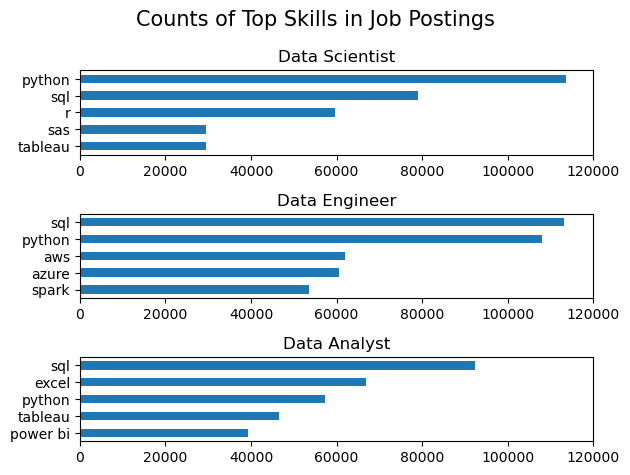

In [37]:

# Other way: using loop
fig, ax = plt.subplots(3,1)

job_titles = ['Data Scientist','Data Engineer','Data Analyst']

for i, job_title in enumerate(job_titles):
    df_explode[df_explode['job_title_short'] == job_title]['job_skills'].value_counts().head(5).sort_values().plot(kind='barh',ax=ax[i],title=job_title,ylabel='')
    ax[i].set_xlim(0,120_000)
fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)
fig.tight_layout()